In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Load Dataset
data = pd.read_csv('../data/transactions.csv')
data.head()


,transaction_amount,transaction_type,customer_id,timestamp,fraud_label
0,100,1,101,2025-03-01,0
1,200,2,102,2025-03-02,0
2,150,1,103,2025-03-03,0
3,10000,3,104,2025-03-04,1
4,50,1,105,2025-03-05,0


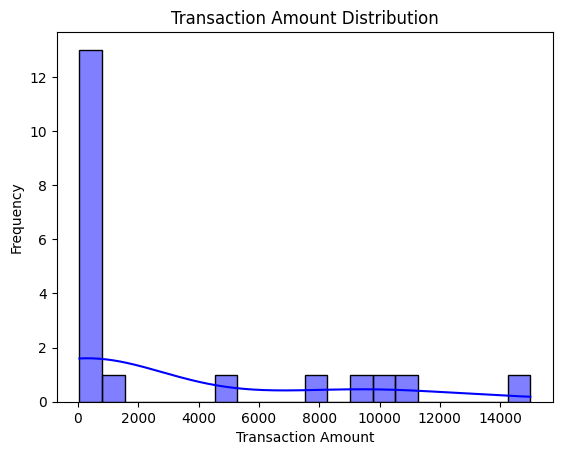

In [3]:
#Distribution Plot
sns.histplot(data['transaction_amount'], bins=20, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


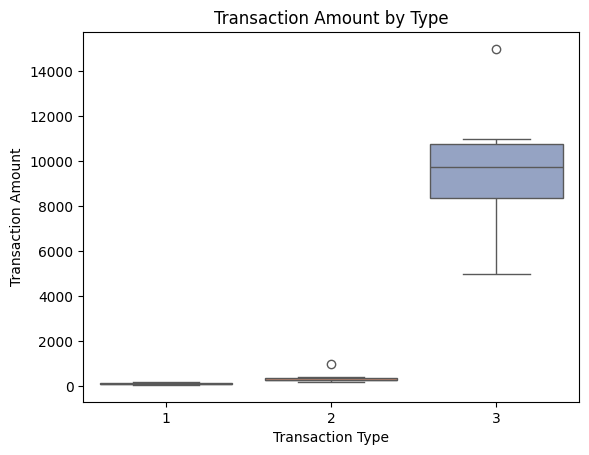

In [4]:
#Box Plot
sns.boxplot(x='transaction_type', y='transaction_amount', data=data, hue='transaction_type', palette='Set2', legend=False)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()


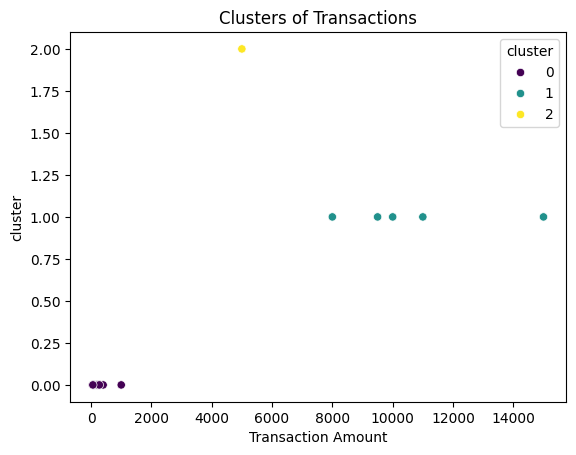

In [5]:
# Assuming you clustered based on 'transaction_amount' only
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['transaction_amount']])
sns.scatterplot(x='transaction_amount', y='cluster', hue='cluster', data=data, palette='viridis')
plt.title('Clusters of Transactions')
plt.xlabel('Transaction Amount')
plt.show()

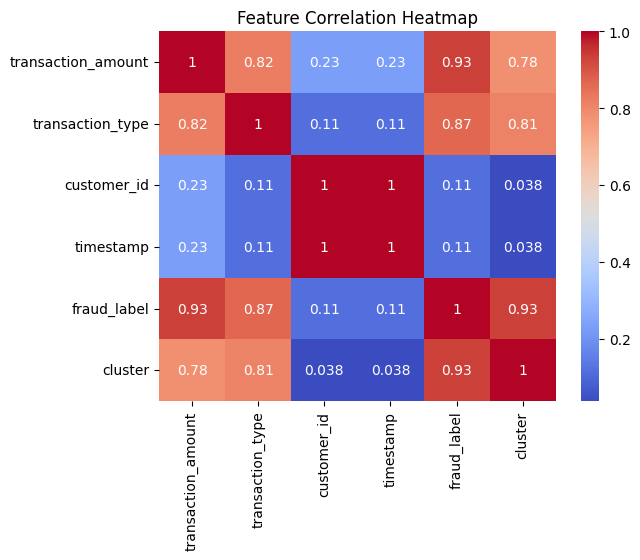

In [6]:
#Heatmap (Correlation Matrix)
data['timestamp'] = pd.to_datetime(data['timestamp']).astype(int) / 10**9  # Convert to numeric
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
